In [ ]:
# KNN Classification - Supervised Machine Learning Algorithm used for both classification and regression
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
filename = '/content/pima-indians-diabetes.data.csv'
names = [
    'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'
]
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:, 0:8]
Y = array[:, 8]

In [ ]:
dataframe

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
#Apply minmax scaling
X=(X-X.min())/(X.max())-X.min()

In [ ]:
X

array([[0.0070922 , 0.1749409 , 0.08510638, ..., 0.03971631, 0.00074113,
        0.05910165],
       [0.00118203, 0.10047281, 0.07801418, ..., 0.03144208, 0.00041489,
        0.03664303],
       [0.00945626, 0.21631206, 0.07565012, ..., 0.02754137, 0.00079433,
        0.03782506],
       ...,
       [0.00591017, 0.143026  , 0.08510638, ..., 0.03096927, 0.0002896 ,
        0.03546099],
       [0.00118203, 0.14893617, 0.07092199, ..., 0.0355792 , 0.00041253,
        0.05555556],
       [0.00118203, 0.10992908, 0.08274232, ..., 0.03593381, 0.00037234,
        0.02718676]])

In [ ]:
num_folds = 10
kfold = KFold(n_splits=num_folds)

In [ ]:
model = KNeighborsClassifier(n_neighbors=7)#k=17
results = cross_val_score(model, X, Y, cv=kfold)

In [ ]:
results

array([0.67532468, 0.80519481, 0.7012987 , 0.63636364, 0.74025974,
       0.79220779, 0.76623377, 0.83116883, 0.75      , 0.75      ])

In [ ]:
print(results.mean())

0.7448051948051948


### Grid Search Algorithm for Hyperparameter Tuning

In [ ]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
filename = '/content/pima-indians-diabetes.data.csv'
names = [
    'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'
]
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:, 0:8]
Y = array[:, 8]

In [ ]:
#Apply minmax scaling
X=(X-X.min())/(X.max())-X.min()

In [ ]:
#n_neighbors = np.array(range(1,40)) # k=1 to 39 all numbers even and odd will be considered
n_neighbors = np.array([2*i+1 for i in range(0,20)]) #only odd number of clusters (1 3 5 7 ... 39) will be considered
param_grid = dict(n_neighbors=n_neighbors) # used to create a python dictionary called param_grid

In [ ]:
param_grid

{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39])}

In [ ]:
n_neighbors

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.7552584670231729
{'n_neighbors': np.int64(13)}


### Visualizing the CV results

In [ ]:
# search for an optimal value of K for KNN
# range of k we want to try
k_range = range(1, 41)
# empty list to store scores
k_scores = []

#we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, Y, cv=kfold, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
# k_scores=grid.best_score_
pd.Series(k_scores).sort_values(ascending=False)

,0
17,0.760424
15,0.760355
20,0.759211
19,0.759142
16,0.756528
13,0.756476
21,0.755297
11,0.752512
22,0.751384
18,0.751333


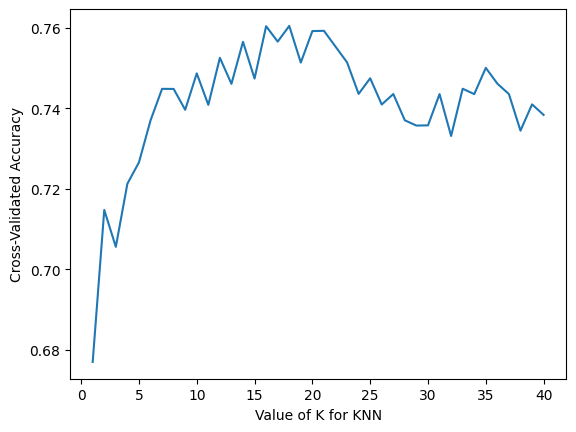

In [ ]:
import matplotlib.pyplot as plt

# plot to see clearly
plt.plot(k_range, k_scores)

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()